In [11]:
%load_ext autoreload
%autoreload 2
%cd ..
import numpy as np
import matplotlib.pyplot as plt
from src.ortools_solver import CVRP_solver
from src.utils import random_choose_candidate_2,show_matrix, get_optimized_sequence
from Projects.pipette_scheduling.src.cost_function import calculate_D, calculate_S_E, calculate_D_prime,add_depot,calculate_T
from src.optimization_methods import row_wise_optimization, greedy_scheduling
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/yq-mew/yq/chem1906


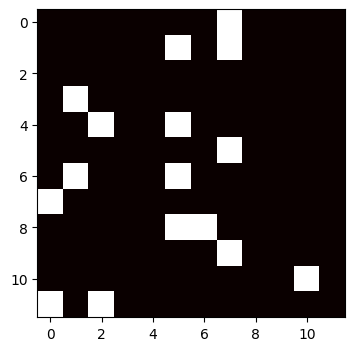

In [5]:
np.random.seed(0)
num_candidates = 16
a = random_choose_candidate_2(12,12,num_candidates)
a[a>0] = 1
jobs = np.argwhere(a)
show_matrix(a)

In [16]:
a = np.zeros((12,12))
a[0,1] = 1
a[0,6] = 1
a[1,2] = 1
a[1,7] = 1
a[1,8] = 1
a[2,2] = 1
a[3,1] = 1
a[3,10] = 1
a[4,0] = 1
a[5,2] = 1
a[5,9] = 1
a[8,5] = 1
a[9,0] = 1
a[9,5] = 1
a[10,1] = 1
a[11,2] = 1
jobs = np.argwhere(a)

In [23]:
for i in range(len(jobs)):
    print(i+1)
    print(jobs[i])

1
[0 1]
2
[0 6]
3
[1 2]
4
[1 7]
5
[1 8]
6
[2 2]
7
[3 1]
8
[ 3 10]
9
[4 0]
10
[5 2]
11
[5 9]
12
[8 5]
13
[9 0]
14
[9 5]
15
[10  1]
16
[11  2]


In [17]:
# CVRP distance matrix
D_S = calculate_D(a.shape[0])
D_D = calculate_D(a.shape[1])
S, E = calculate_S_E(a)   
# calculate distance matrix
D_prime = calculate_D_prime(D_S,D_D, S, E)
D_prime = add_depot(D_prime)
VRP_distance, VRP_recorder = CVRP_solver(D_prime.astype(np.int64), solving_time =20)
print("VRP distance: ", VRP_distance)

VRP distance:  12


In [18]:
get_optimized_sequence(VRP_recorder)

array([[11,  8,  9,  7, 10,  2,  4,  5],
       [14, 12,  1,  3,  6, -1, -1, -1],
       [13, 15, 16, -1, -1, -1, -1, -1]])

In [19]:
# calculate the cost of the non-optimized sequence
tasks = np.array(range(jobs.shape[0]))
tasks = tasks+1
# if tasks.shape[0] %8 != 0, pad with -1
if tasks.shape[0] %8 != 0:
    tasks = np.pad(tasks, (0, 8-tasks.shape[0]%8), 'constant', constant_values=-1)
unoptimized_seuqnece = tasks.reshape(-1, 8)
t = calculate_T(unoptimized_seuqnece)
d = D_prime[1:, 1:]
non_optimized_distance = np.trace(np.dot(t.T, d))
# change non_optimized_distance to integer
non_optimized_distance = int(non_optimized_distance)
print(f'non_optimized_distance: {non_optimized_distance}')

non_optimized_distance: 21


In [20]:
unoptimized_seuqnece

array([[ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16]])

In [8]:
# calculate the cost of the row-wise optimized sequence
index_matrix = np.zeros((96,96))
for j in range(jobs.shape[0]):
    index_matrix[jobs[j, 0], jobs[j, 1]] = j+1
row_wise_optimized_sequence = row_wise_optimization(index_matrix)
if row_wise_optimized_sequence.shape[0] %8 != 0:
    row_wise_optimized_sequence = np.pad(row_wise_optimized_sequence, (0, 8-row_wise_optimized_sequence.shape[0]%8), 'constant', constant_values=-1)
row_wise_optimized_sequence = row_wise_optimized_sequence.reshape(-1, 8)
t = calculate_T(row_wise_optimized_sequence)
row_wise_optimized_distance = np.trace(np.dot(t.T, d))
# change non_optimized_distance to integer
row_wise_optimized_distance = int(row_wise_optimized_distance)
print(f'row_wise_optimized_distance: {row_wise_optimized_distance}')

row_wise_optimized_distance: 20
